In [1]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline 
from collections import Counter

# Feature Coherence Analysis




In [2]:
def evaluate_explanation(explanation:str, target_word: str, animal_class:str):
    """
    Heuristically Evaluate the explanation
    Args:
    explanation: an explanation of a certain feature (i.e. from the gemmascope)
    target_word: the word that triggered such explanation
    animal_class: the animal class under which the word falls
    """
    
    ANIMAL_CLASSES = ["mammal", "reptile", "bird", "fish", "insect", "amphibian"]
    if not animal_class in ANIMAL_CLASSES:
        raise AssertionError(f"{animal_class} not in allowe classes. Please choose one among: {ANIMAL_CLASSES}")
    
    #represent the mention
    mention =  re.compile(rf"(\"|'){target_word}(\"|')")
    # mention = ' "'+ target_word +'" '
    # mention = "'"+ target_word +"'"
    #format target word
    target_word = re.compile(" "+target_word)
    
    if re.search("animal", explanation): #check for animal concept
        return 1
    elif re.search(animal_class, explanation): #check for category concept
        return 2
    elif re.search(target_word, explanation): #check for specific concept
        return 3
    elif re.search(mention, explanation): # check for the mention of the word related to the concept
       return 4
    else:
        return 0

#trial
explanation = """ the concept of cat """
target_word = "cat"

evaluate_explanation(explanation, target_word, animal_class="mammal")

3

In [93]:
plot_legend = {"0": "no coherent explanation",
 "1": "explanation referred to animals and alike",
 "2": "explanation referred to animal hyperonym",
 "3": "explanation referred to hyponym",
 "4": "explanation reffered to the mention of the animal word"
 }


columns_map = {0: "no coherent explanation",
 1: "explanation referred to animals and alike",
 2: "explanation referred to animal hyperonym",
 3: "explanation referred to hyponym",
 4: "explanation reffered to the mention of the animal word"
 }

In [4]:
# open the extracted features
df = pd.read_csv("./topk_explanations2.tsv", sep = "\t", index_col= "Unnamed: 0"); df.head(15)

,Top1_feature,Top2_feature,Top3_feature,Top4_feature,Top5_feature
"lion,The lion is a mammal",words and phrases related to animals,technical terms and keywords related to progra...,references to individual songs or personal nar...,elements related to themes of social justice a...,details related to film production and notable...
"llama,The llama is a mammal",numerical data and statistics related to incid...,elements related to academic citations and aff...,words and phrases related to animals,references to individual songs or personal nar...,specific references to parts of plants or bota...
"rabbit,The rabbit is a mammal",numerical data and statistics related to incid...,words and phrases related to animals,elements related to themes of social justice a...,technical terms and keywords related to progra...,sequences that denote data structures or code ...
"mongoose,The mongoose is a mammal",terms related to the performance or descriptio...,references to specific names and titles in a n...,elements related to themes of social justice a...,words and phrases related to animals,terms related to ecological and biological con...
"hamster,The hamster is a mammal",words and phrases related to animals,numerical data and statistics related to incid...,elements related to themes of social justice a...,references to individual songs or personal nar...,phrases associated with rodent-borne diseases
"whale,The whale is a mammal",numerical data and statistics related to incid...,"terms related to marine animals, particularly ...",words and phrases related to animals,specific medical terms and concepts related to...,references to individual songs or personal nar...
"boar,The boar is a mammal",words and phrases related to animals,references to individual songs or personal nar...,specific references to parts of plants or bota...,patterns related to codes or sequences of char...,technical terms and keywords related to progra...
"puma,The puma is a mammal",terms related to the performance or descriptio...,elements related to academic citations and aff...,technical terms and keywords related to progra...,details related to confirmation and verificati...,references to musical groups or artists
"dolphin,The dolphin is a mammal",numerical data and statistics related to incid...,words and phrases related to animals,"terms related to marine animals, particularly ...",references to individual songs or personal nar...,terms related to maritime activities and regul...
"otter,The otter is a mammal",numerical data and statistics related to incid...,words and phrases related to animals,references to individual songs or personal nar...,specific references to parts of plants or bota...,technical terms and keywords related to progra...


In [5]:
# evaluate feature explanations with the defined heuristics
all_rows_values = []
for index, row in df.iterrows():
    split_index = index.split(",")
    word = split_index[0]
    animal_class = split_index[-1].split()[-1]

    row_values = []
    for i in range(len(row)):
        explanation_value = evaluate_explanation(row[i], word, animal_class)
        row_values.append(explanation_value)
    
    all_rows_values.append(np.array(row_values))
        
all_rows_values = np.array(all_rows_values)

In [6]:
#dataframe of values
values_dataframe = pd.DataFrame(all_rows_values, columns = df.columns); values_dataframe.index = [i.split(",")[0] for i in df.index]
values_dataframe

,Top1_feature,Top2_feature,Top3_feature,Top4_feature,Top5_feature
lion,1,0,0,0,0
llama,0,0,1,0,0
rabbit,0,1,0,0,0
mongoose,0,0,0,1,0
hamster,1,0,0,0,0
...,...,...,...,...,...
spider,0,0,1,0,0
cricket,0,0,0,0,0
ant,0,0,0,0,3
mite,0,0,0,0,0


In [85]:
# check the distribution of values over features
counts = []
for  col in values_dataframe.columns:
    count = Counter(values_dataframe[col].tolist())
    counts.append(count)
 

value_counts = pd.DataFrame(counts).set_index(values_dataframe.columns)
value_counts = value_counts.loc[:, sorted(value_counts.columns)]
value_counts

,0,1,2,3,4
Top1_feature,98,12,NaN,1,NaN
Top2_feature,80,29,NaN,1,1.0
Top3_feature,94,15,1.0,1,NaN
Top4_feature,97,10,2.0,2,NaN
Top5_feature,92,12,4.0,2,1.0


In [99]:
value_counts.rename(columns_map, axis = 1)

,no coherent explanation,explanation referred to animals and alike,explanation referred to animal hyperonym,explanation referred to hyponym,explanation reffered to the mention of the animal word
Top1_feature,98,12,NaN,1,NaN
Top2_feature,80,29,NaN,1,1.0
Top3_feature,94,15,1.0,1,NaN
Top4_feature,97,10,2.0,2,NaN
Top5_feature,92,12,4.0,2,1.0


In [98]:
value_counts.rename(columns_map, axis = 1).T

,Top1_feature,Top2_feature,Top3_feature,Top4_feature,Top5_feature
no coherent explanation,98.0,80.0,94.0,97.0,92.0
explanation referred to animals and alike,12.0,29.0,15.0,10.0,12.0
explanation referred to animal hyperonym,NaN,NaN,1.0,2.0,4.0
explanation referred to hyponym,1.0,1.0,1.0,2.0,2.0
explanation reffered to the mention of the animal word,NaN,1.0,NaN,NaN,1.0


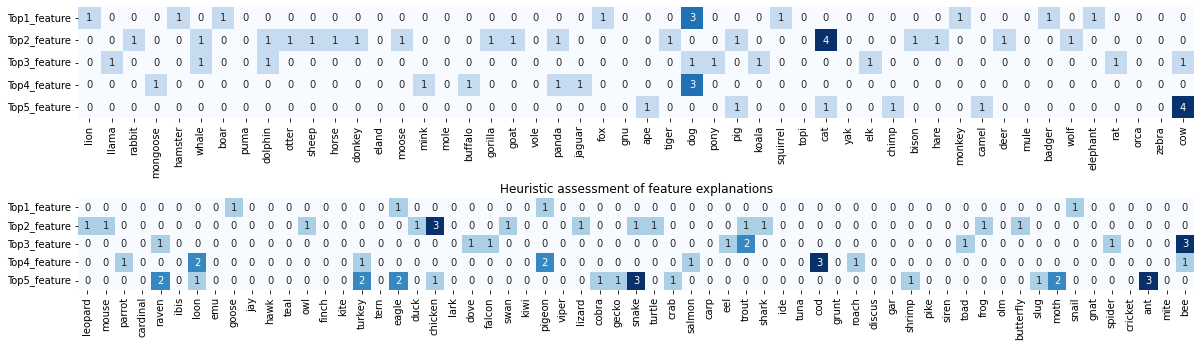

In [ ]:
fig, ax = plt.subplots(2, figsize  = (20,18), squeeze = True)
#plt.figure( figsize= (40,40))
plt.title("Heuristic assessment of feature explanations")
sns.heatmap(values_dataframe[:50].T, ax = ax[0], cmap = "Blues", square= True, cbar = False, annot = True)
sns.heatmap(values_dataframe[50:].T, ax = ax[1], cmap = "Blues", square= True, cbar = False, annot = True)
plt.subplots_adjust(hspace = 0, bottom = 0.6)


# Global Features analysis

In [288]:
# group all numerical values to count and plot them in descending order
all_values = []
for row in values_dataframe.values:
    for el in row:
        all_values.append(el)
print(Counter(all_values))
v = pd.DataFrame(Counter(all_values).most_common()).set_index(0).T.rename(columns_map, axis = 1)

Counter({0: 461, 1: 78, 3: 7, 2: 7, 4: 2})


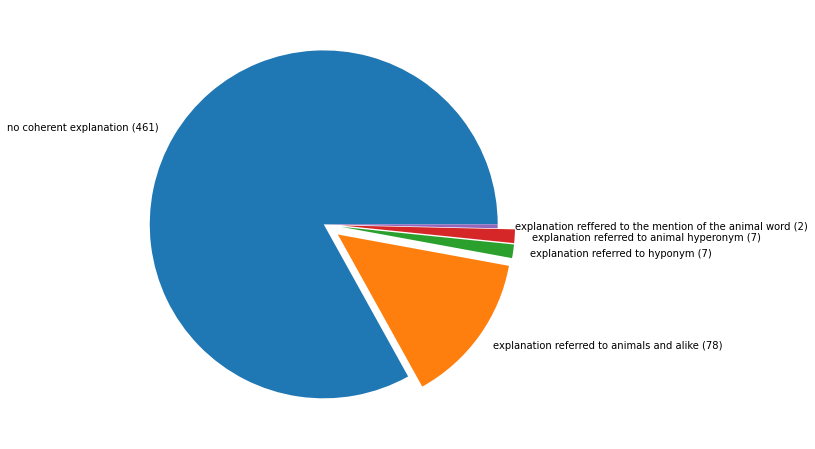

In [336]:
# pie chart of the distribution of the explanation tye over all the topk level and all words
palette_color = sns.color_palette('bright')
plt.figure(figsize = (10,8))
explode = [0, 0.1, 0.1,0.1,0]
plt.pie(v.values.squeeze(),explode = explode, labels = [f"{i} ({n})" for i,n in zip(v.columns, v.values.squeeze())]); #autopct='%.0f%%' 

---
## Explanations type analysis

In [44]:
#group all the explanations
all_explanations = []
for row in df.values:
    for exp in row:
        all_explanations.append(exp)
len(all_explanations), len(set(all_explanations))

# count explanations and order them in descending order
ordered_explanations = Counter(all_explanations).most_common()

(555, 87)

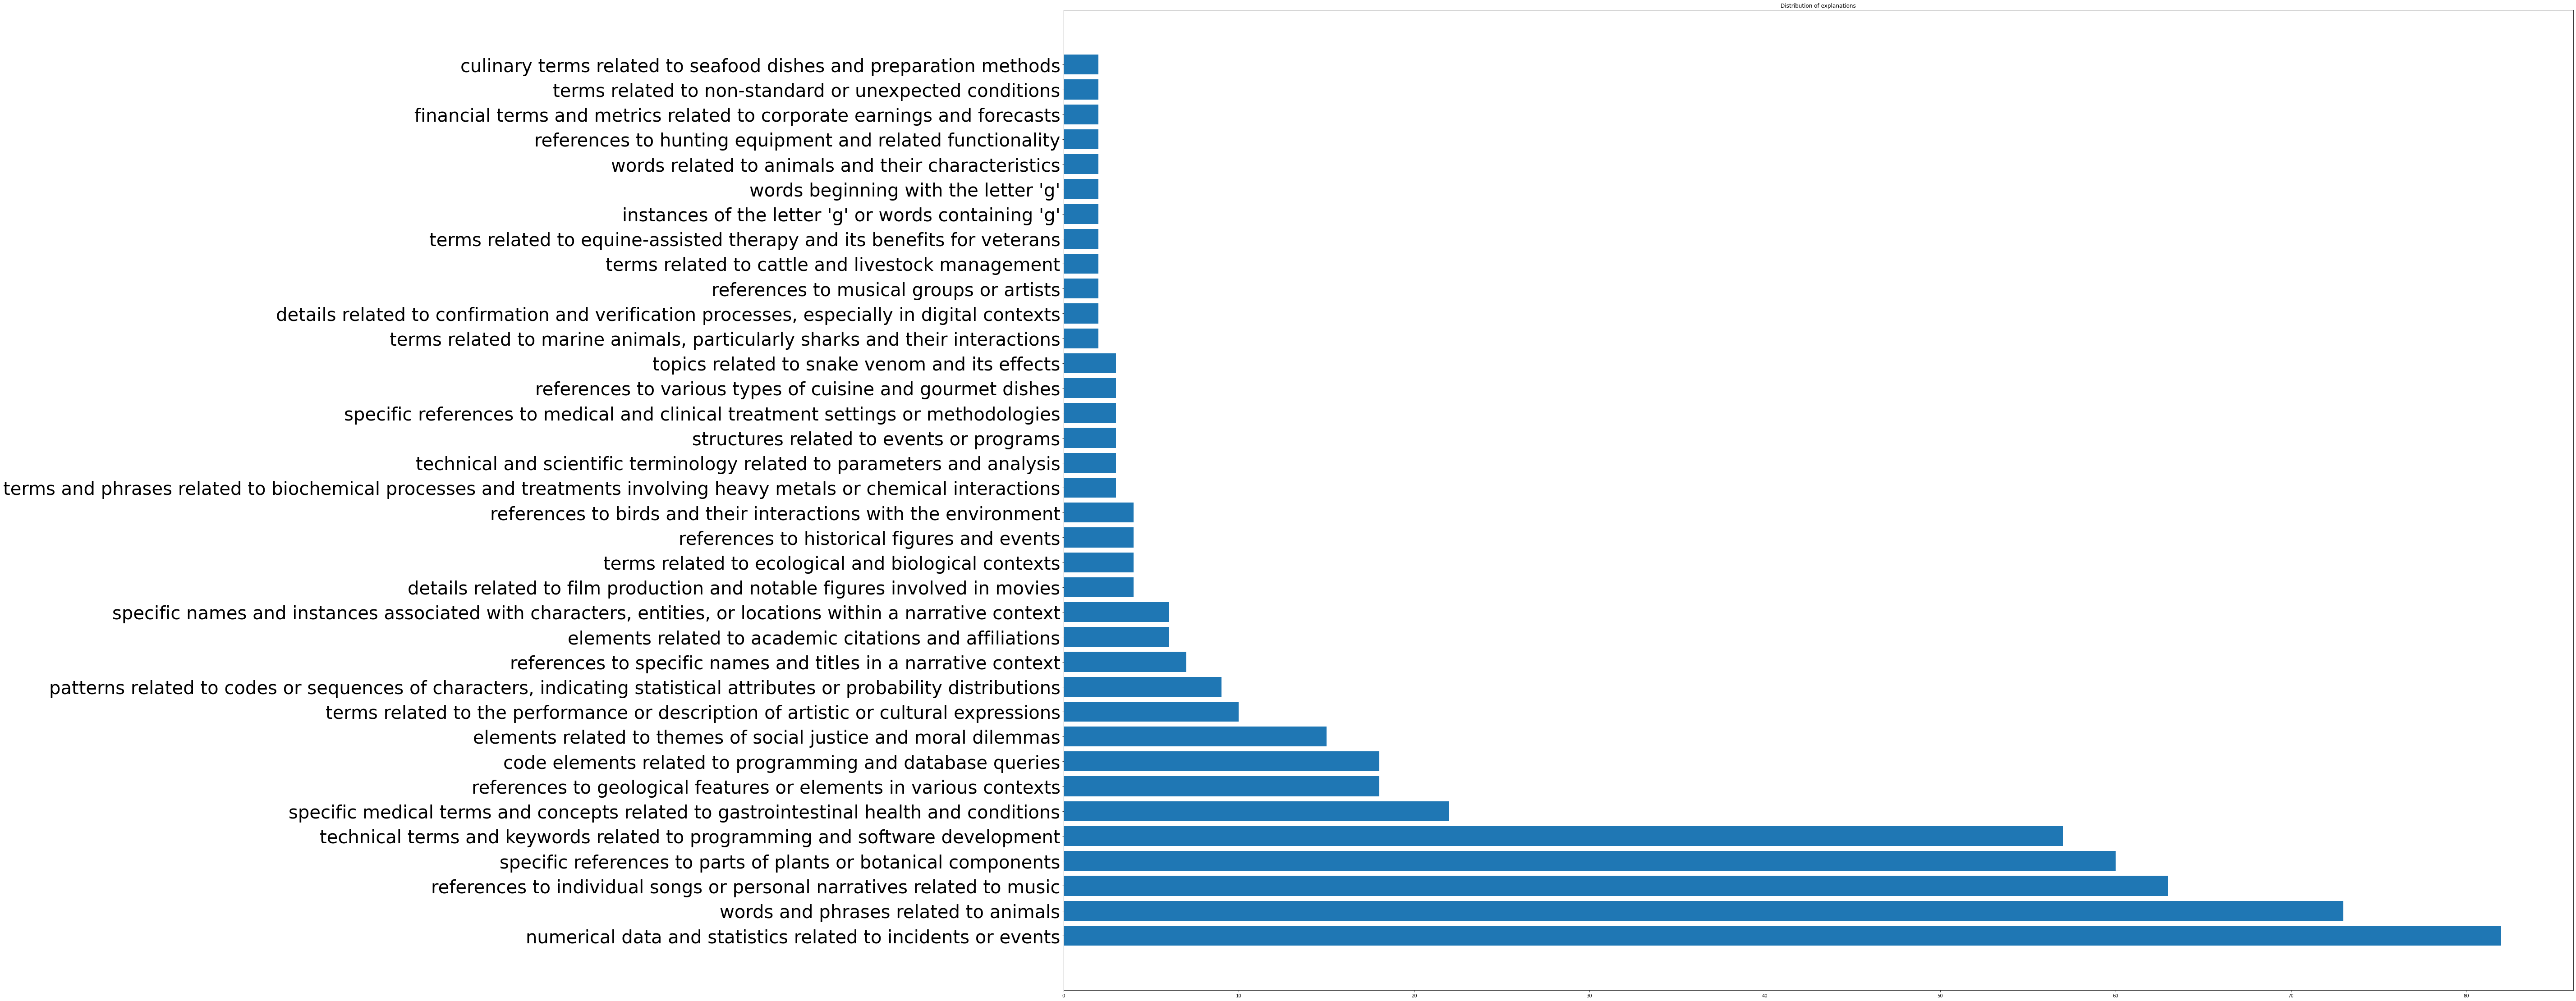

In [337]:
heights = [i[-1] for i in ordered_explanations if not i[-1] == 1]#[:50]
values = [i[0] for i in ordered_explanations if not i[-1] == 1]#[:50]

plt.figure(figsize=(60,40))
bars = plt.barh(values, heights)
plt.title("Distribution of explanations")
# Annotating bars

plt.yticks(fontsize = 40);



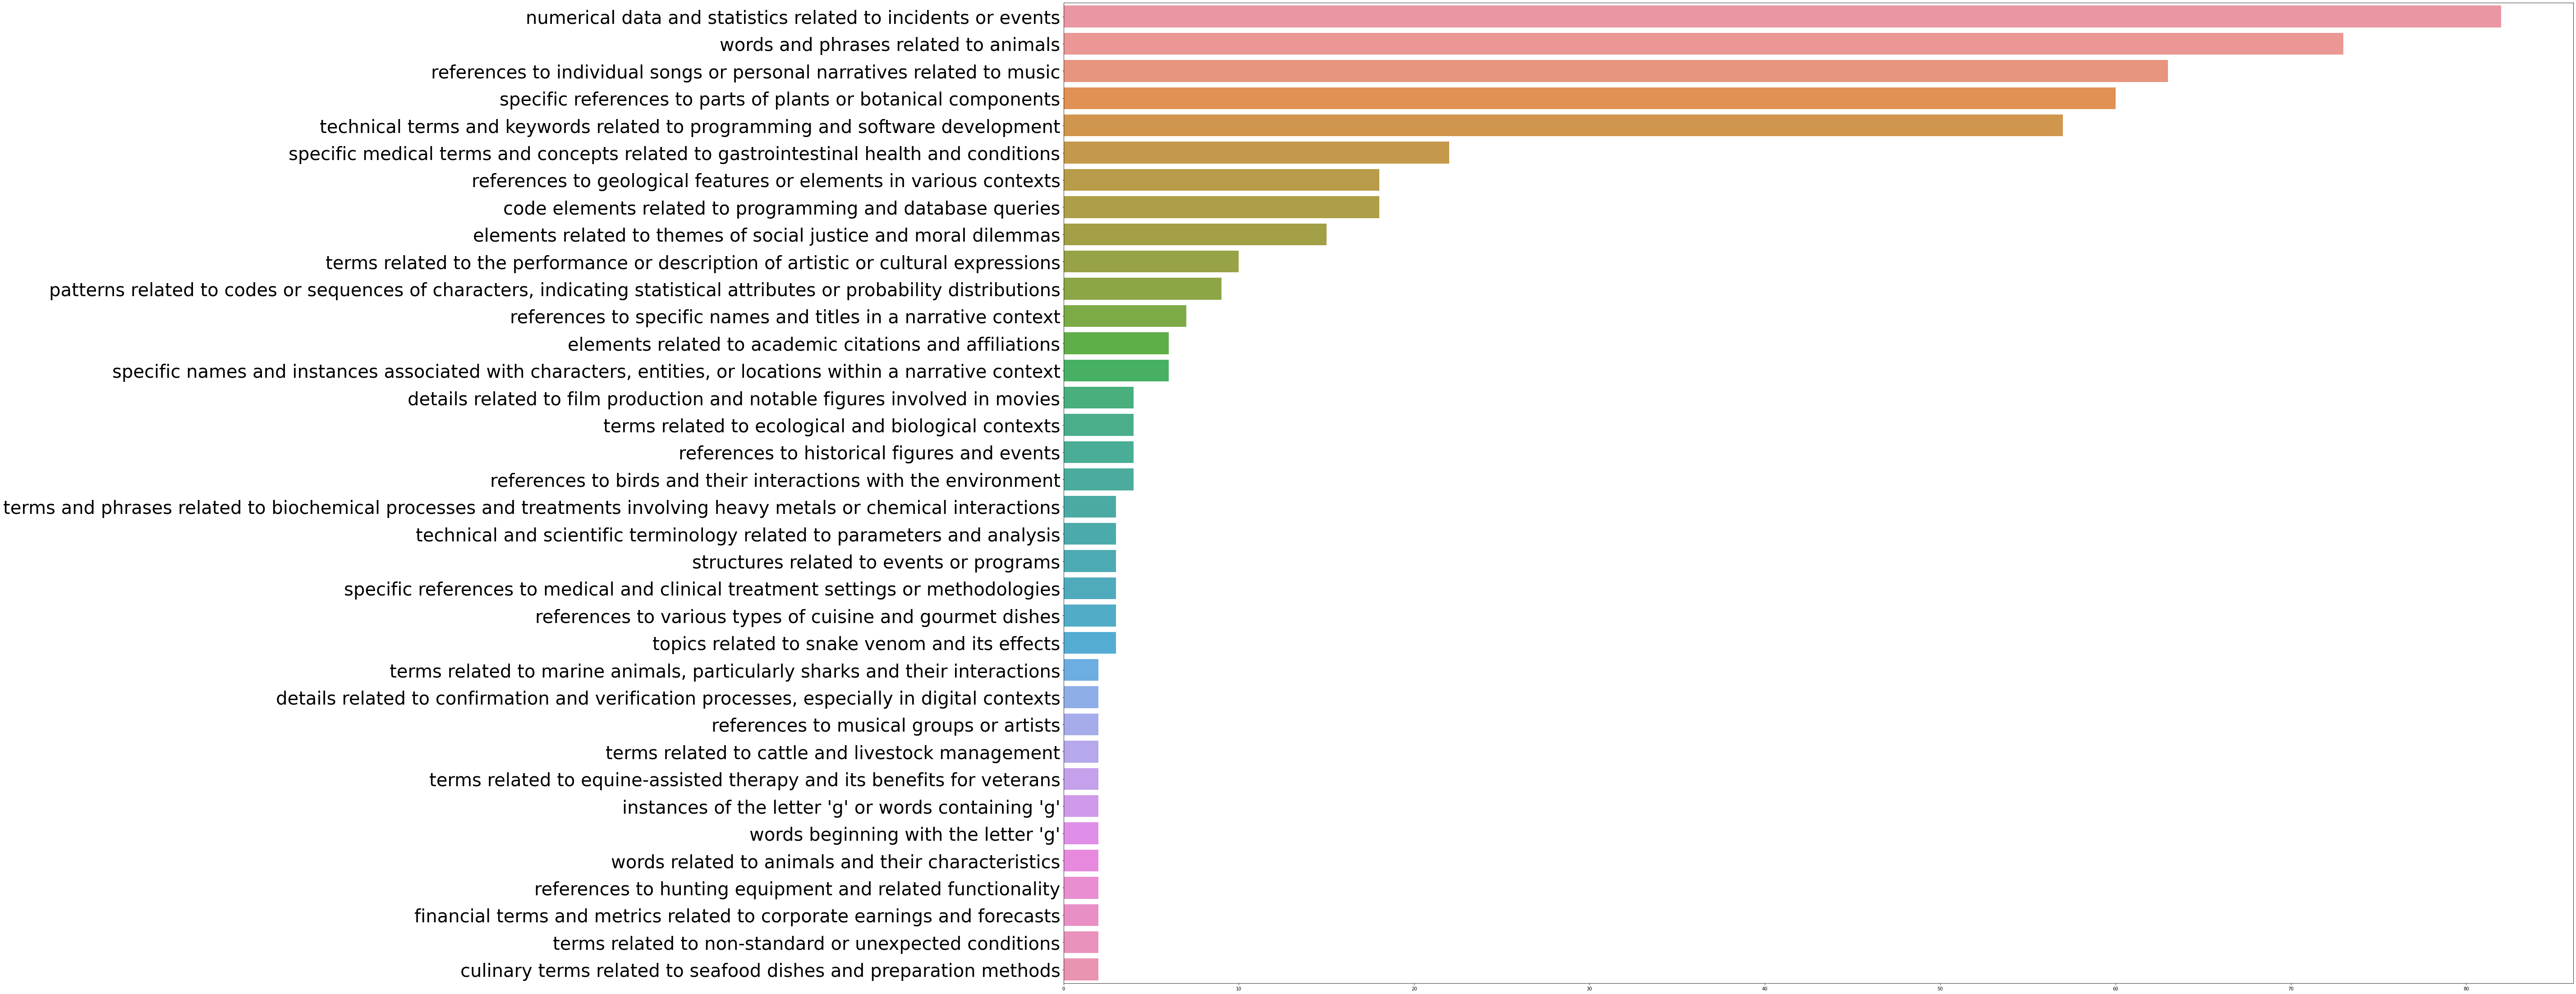

In [339]:
#descending barplot with seaborn
#TODO add title; annotate bars with values
plt.figure(figsize=(60,40))
bars = sns.barplot(x = heights, y = values)
#plt.title("Distribution of explanations")
plt.yticks(fontsize = 40);

---
# Explanations in Embeding Space

temptative

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer

In [387]:
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

#sentences = list(set(all_explanations))
sentences = all_explanations
embeddings = model.encode(sentences)
embeddings.shape

(555, 384)

In [413]:
SEED = 172

def display_PROJ_pretty(embeddings, embedding_sentences, labels, PROJ = 'TSNE'):

  if PROJ == 'TSNE':
    #TSNE Proj
    tsne = TSNE(n_components=2, random_state = SEED)

    proj_results = tsne.fit_transform([np.array(embedding) for embedding in embeddings])
   
  elif PROJ == 'UMAP':
    #UMAP
    reducer = umap.UMAP(random_state = SEED)
    proj_results = reducer.fit_transform([np.array(embedding) for embedding in embeddings]) #todo check why ump is giving problems


  #get_clusters = DBSCAN(eps=3, min_samples=10).fit_predict(tsne_results)

  fig = go.Figure()
  
  Target =  pd.DataFrame(embedding_sentences, columns =['sentence'])

  tracePROJ = go.Scatter(
      x = proj_results[:,0],
      y = proj_results[:,1],
     opacity = 0.8,
     name = 'TSNE clusters' if PROJ == 'TSNE' else 'UMAP clusters',
      #hoveron = Target,
      mode = 'markers',
      text = Target['sentence'],
      showlegend = True,
      marker = dict(
          size = 3,
          #color = labels,
          #color = "LightSkyBlue",
          colorscale ='Jet',
          showscale = False,

      )
  )
  data = [tracePROJ]
  
  layout = dict(title = 'TSNE clusters' if PROJ == 'TSNE' else 'UMAP clusters',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True,
              width=1000,
              height=800,

             )

  fig = dict(data=data, layout=layout)
  py.iplot(fig, filename='styled-scatter');

  return None#proj_results

In [416]:
labels = [str(i) for i in range(5)]
sentences = all_explanations
embeddings = model.encode(sentences)
embeddings.shape
display_PROJ_pretty(embeddings, sentences, labels, PROJ = 'TSNE')

In [415]:
sentences = list(set(all_explanations))

embeddings = model.encode(sentences)
embeddings.shape
display_PROJ_pretty(embeddings, sentences, labels, PROJ = 'TSNE')

## Ways to improve the Heuristics

Refine the heuristic to identify coherent explanations
- Use WordNet: find a way to link the explanation to a knowledge base and extract synonyms or related terms wrt the target word
    - Check for synonyms, hyperonym and pertanyms
- Use a LLM to judge the coherence of the explanation 

## LLM Assessment
TODO